<a href="https://colab.research.google.com/github/Dikshant0000/71_DAV1/blob/main/71_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df = df[["households", "population","latitude"]]
df.head(10)

,households,population,latitude
0,472.0,1015.0,34.19
1,463.0,1129.0,34.40
2,117.0,333.0,33.69
3,226.0,515.0,33.64
4,262.0,624.0,33.57
5,239.0,671.0,33.63
6,633.0,1841.0,33.61
7,158.0,375.0,34.83
8,1056.0,3134.0,33.61
9,271.0,787.0,34.83


In [ ]:
df.tail()

,households,population,latitude
16995,369.0,907.0,40.58
16996,465.0,1194.0,40.69
16997,456.0,1244.0,41.84
16998,478.0,1298.0,41.80
16999,270.0,806.0,40.54


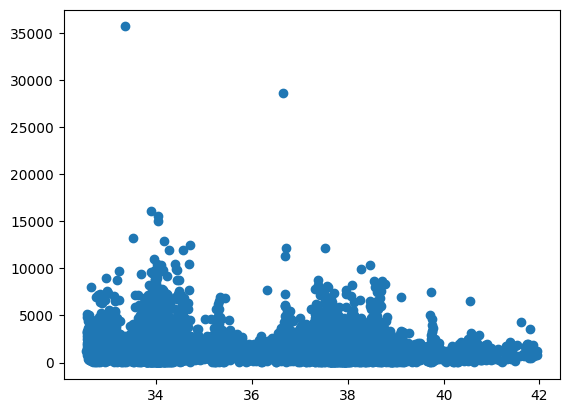

In [ ]:
plt.scatter(df['latitude'], df['population'])

(array([1.6314e+04, 5.9200e+02, 8.0000e+01, 9.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.00000e+00, 3.57090e+03, 7.13880e+03, 1.07067e+04, 1.42746e+04,
        1.78425e+04, 2.14104e+04, 2.49783e+04, 2.85462e+04, 3.21141e+04,
        3.56820e+04]),
 <BarContainer object of 10 artists>)

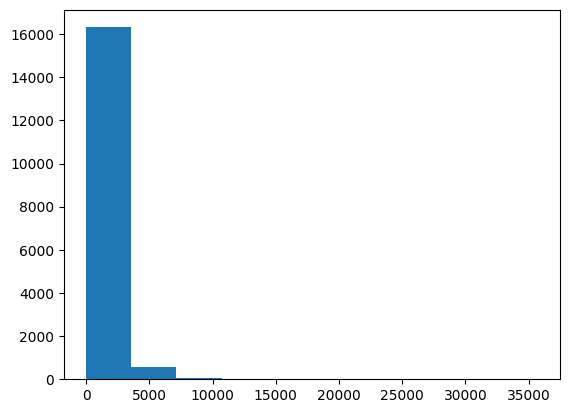

In [ ]:
plt.hist(df["population"])

In [ ]:
model = LinearRegression()
model.fit(df["population"].values.reshape(-1, 1), df["latitude"])

LinearRegression()

Text(0.01, 0.9, 'y = 35.921 + -0.0 * x')

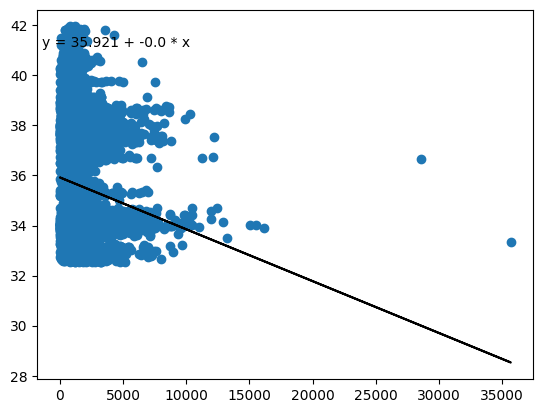

In [ ]:
y_pred = model.predict(df["population"].values.reshape(-1, 1))
plt.scatter(df['population'], df['latitude'])
plt.plot(df["population"], y_pred, color="Black")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <- read.csv("california_housing_train.csv")

In [ ]:
df = select(df,c("latitude", "population"))
head(df)

,latitude,population
,<dbl>,<dbl>
1,34.19,1015
2,34.40,1129
3,33.69,333
4,33.64,515
5,33.57,624
6,33.63,671


In [ ]:
summary(df)

    latitude       population   
 Min.   :32.54   Min.   :    3  
 1st Qu.:33.93   1st Qu.:  790  
 Median :34.25   Median : 1167  
 Mean   :35.63   Mean   : 1430  
 3rd Qu.:37.72   3rd Qu.: 1721  
 Max.   :41.95   Max.   :35682  

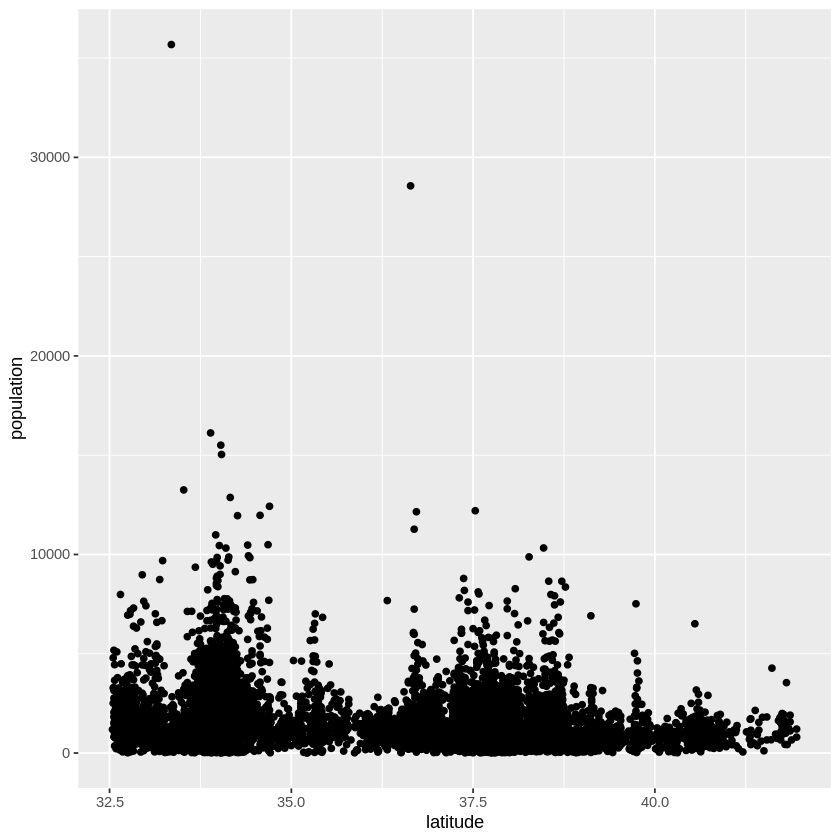

In [ ]:
ggplot(df, aes(x=latitude, y=population)) +
    geom_point()

In [ ]:
model = lm(population ~ latitude, data=df)
summary(model)


Call:
lm(formula = population ~ latitude, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -1588   -639   -256    293  34116 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3558.275    146.099   24.36   <2e-16 ***
latitude     -59.753      4.094  -14.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1141 on 16998 degrees of freedom
Multiple R-squared:  0.01238,	Adjusted R-squared:  0.01232 
F-statistic: 213.1 on 1 and 16998 DF,  p-value: < 2.2e-16


In [ ]:
pred <- predict(model, data = df$latitude)

[1] "y = 3558.274963 + -59.752634 * x"

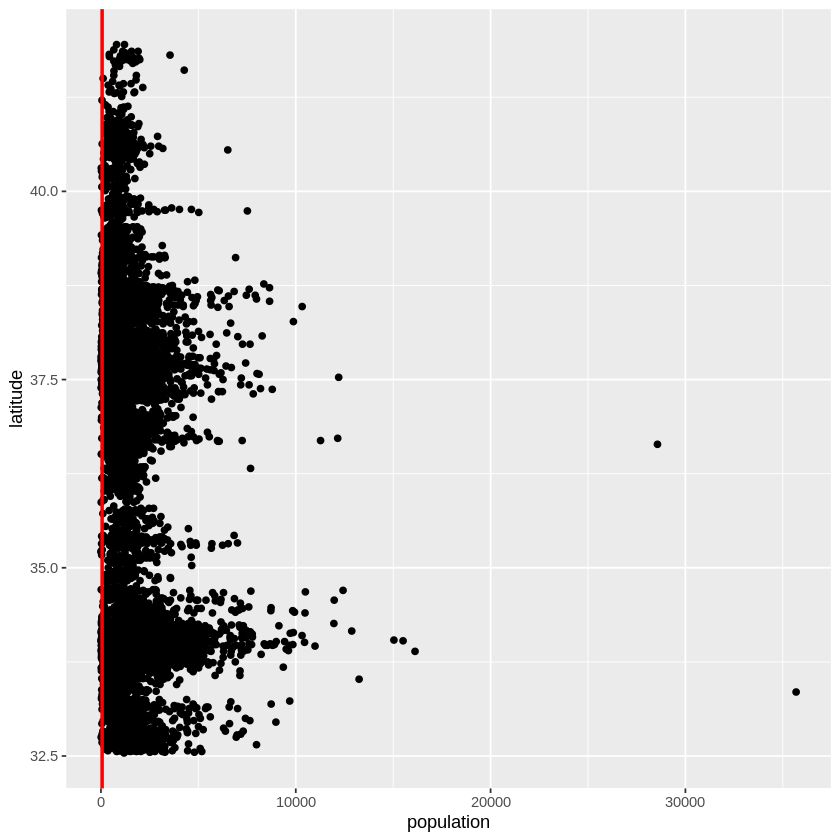

In [ ]:
ggplot(df, aes(x=population, y=latitude)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="Red",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])